# Método de aceptación y rechazo

Número de valores generados: 50000
Número de iteraciones: 99804
Razón entre valores generados y aceptados: 0.5009819245721614


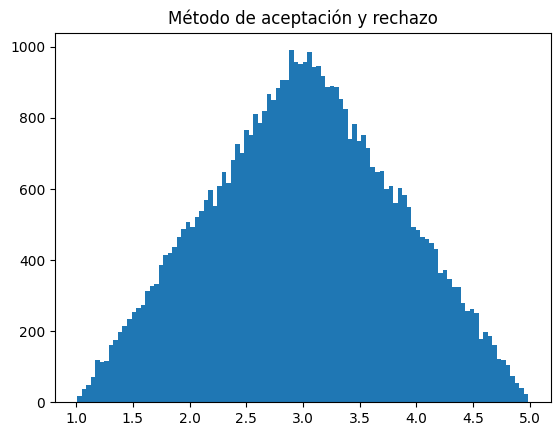

Valor esperado: 3.0003052698242345
Valor esperado real: 3
Varianza: 0.6667757435284352
Varianza real: 0.6666666666666666


In [ ]:
from random import random as rnd
import numpy as np
import matplotlib.pyplot as plt


#Distribución triangular:
def triangle(x, a, b, c):
     if (a <= x < b):
          return (2*(x - a))/((c-a)*(b-a))
     elif (b <= x <= c):
          return(2*(c - x))/((c-a)*(c-b))
     else: 
          return 0

#Aceptacion y rechazo:
#Genera n números aleatorios con la distribución triangular con parámetros a=1, b=3 y c=5
def rejection (n = 1000):
     values = []
     i = 0     #Número de iteraciones

     #Genera n números aleatorios con la distribución triangular
     while True:
          #Genera un par de números aleatorios con distribución uniforme(0,1)
          R = [rnd(), rnd()]
          #Traslada la primera componente al soporte de la función de distribución
          R[0] = 1 + 4*R[0]
          i += 1 
          if (R[1] <= triangle(R[0],1,3,5)/.5): #Si la segunda componente se encuentra en el hipografo de la función de distribución 
               values.append(R[0])
               if (len(values) >= n): #El ciclo se rompe cuando se han generado n valores
                    break
          else:
               continue #El proceso se repite en caso contrario

     #Imprime el número de valores generados, el numero de iteraciones y la razón entre el numero de valores aceptados y el número de iteraciones
     print("Número de valores generados:", len(values))
     print("Número de iteraciones:", i)
     print("Razón entre valores generados y aceptados:", len(values)/i)
     return values

rand_values = rejection(50000)

plot = plt.hist(rand_values, bins = 100)
plt.title("Método de aceptación y rechazo")
plt.show()

print("Valor esperado:", np.mean(rand_values))
print("Valor esperado real: 3")
print("Varianza:", np.var(rand_values))
print("Varianza real:", 2/3)